# Setup

In [1]:
import my_util

import mlflow

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')  # The warnings are reviewed and then hidden.

# Set up MLflow
mlflow.set_tracking_uri("http://localhost:8080")

experiment_name = "telco_churn"
# experiment = mlflow.get_experiment_by_name(experiment_name)
# if experiment is None:
#     experiment_id = mlflow.create_experiment(experiment_name)
# else:
#     experiment_id = experiment.experiment_id

mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/606129430161485727', creation_time=1759455759594, experiment_id='606129430161485727', last_update_time=1759455759594, lifecycle_stage='active', name='telco_churn', tags={'mlflow.experimentKind': 'custom_model_development'}>

# Plan for churn prediction
Use logistic regression, random forest, and xgboost with hyperparameter tuning to improve prediction.

In [2]:
# Load sample data
customers = pd.read_csv(r'..\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv')

customers = customers.drop(['TotalCharges', 'PhoneService', 'customerID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    customers.drop('Churn', axis=1), customers['Churn'], test_size=0.2, random_state=42
)

# Create a preprocessing and modeling pipeline
numeric_features = ["tenure", "MonthlyCharges"]
categorical_features = [col for col in X_train.columns if col not in numeric_features]

# Preprocessing pipeline
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(drop="first", sparse_output=False))]
)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


TRAINING LOGISTIC REGRESSION
Running in QUICK mode (faster, smaller grid)
Starting grid search...

Best parameters: {'regressor__C': 1.0, 'regressor__class_weight': None, 'regressor__penalty': 'l2', 'regressor__solver': 'liblinear'}
Best CV roc_auc: 0.8391

Logistic Regression Results
Train AUC: 0.8424
Test AUC:  0.8607
Overfit:   -0.0183

Test Set Performance (threshold=0.5):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix (threshold=0.5):
[[936 100]
 [155 218]]
TN=936, FP=100, FN=155, TP=218

OPTIMAL THRESHOLD ANALYSIS (optimizing f1)
Optimal threshold: 0.330
Precision: 0.577
Recall:    0.767
F1 Score:  0.658

Confusion Matrix:
[[826 210]
 [ 87 286]]


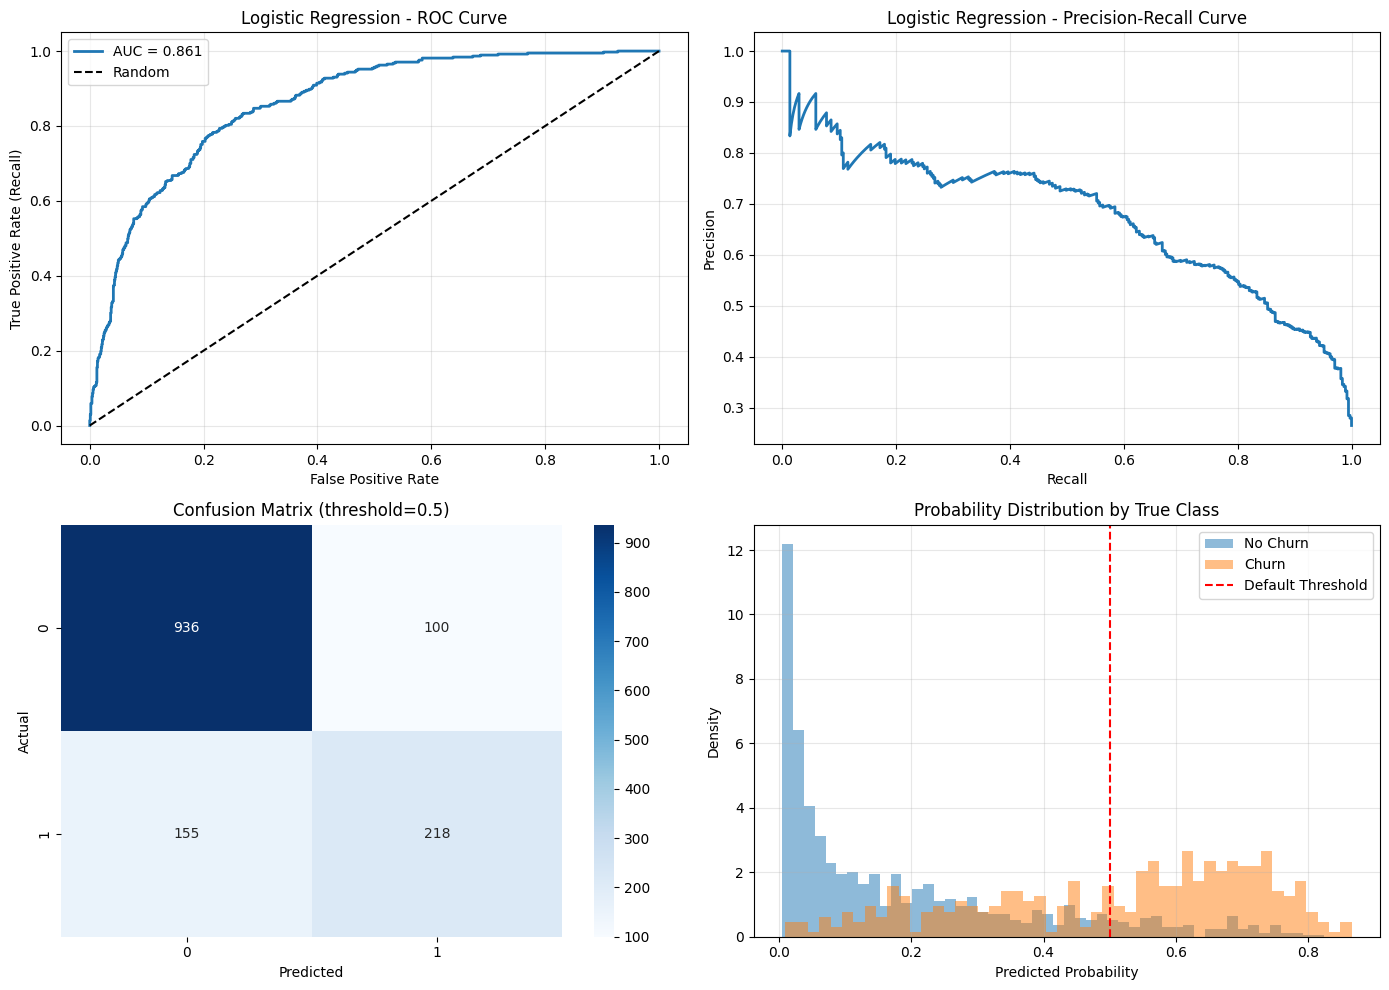

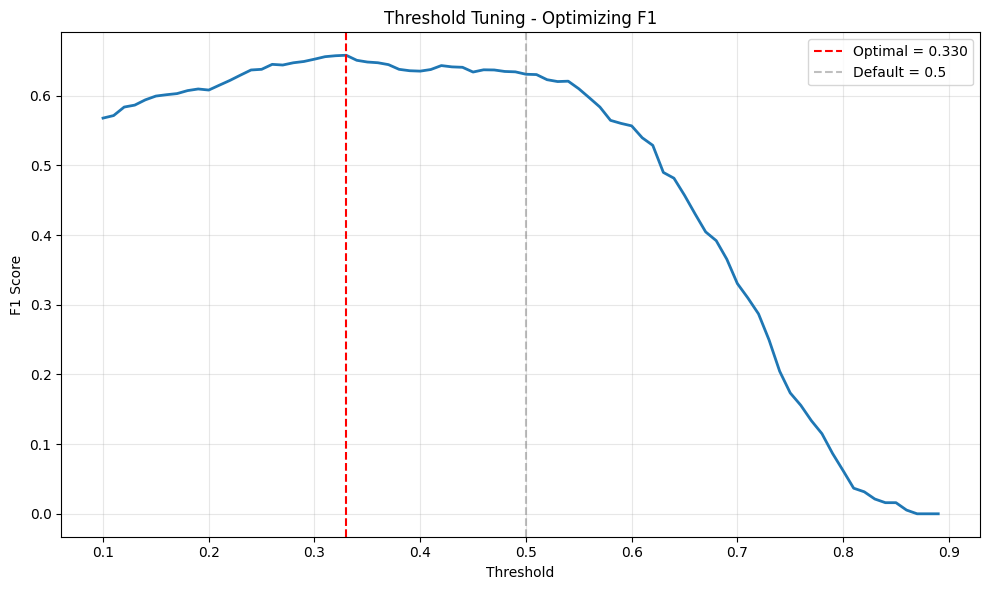

2025/10/06 16:06:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged Logistic_Regression to MLflow
🏃 View run Logistic_Regression at: http://localhost:8080/#/experiments/606129430161485727/runs/bcac3d2c323944948dccc2001d54973d
🧪 View experiment at: http://localhost:8080/#/experiments/606129430161485727

TRAINING RANDOM FOREST
Running in QUICK mode (faster, smaller grid)
Starting grid search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best CV roc_auc: 0.8406

Random Forest Results
Train AUC: 0.9219
Test AUC:  0.8642
Overfit:   0.0577

Test Set Performance (threshold=0.5):
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.57      0.79      0.66       373

    accuracy                           0.78    

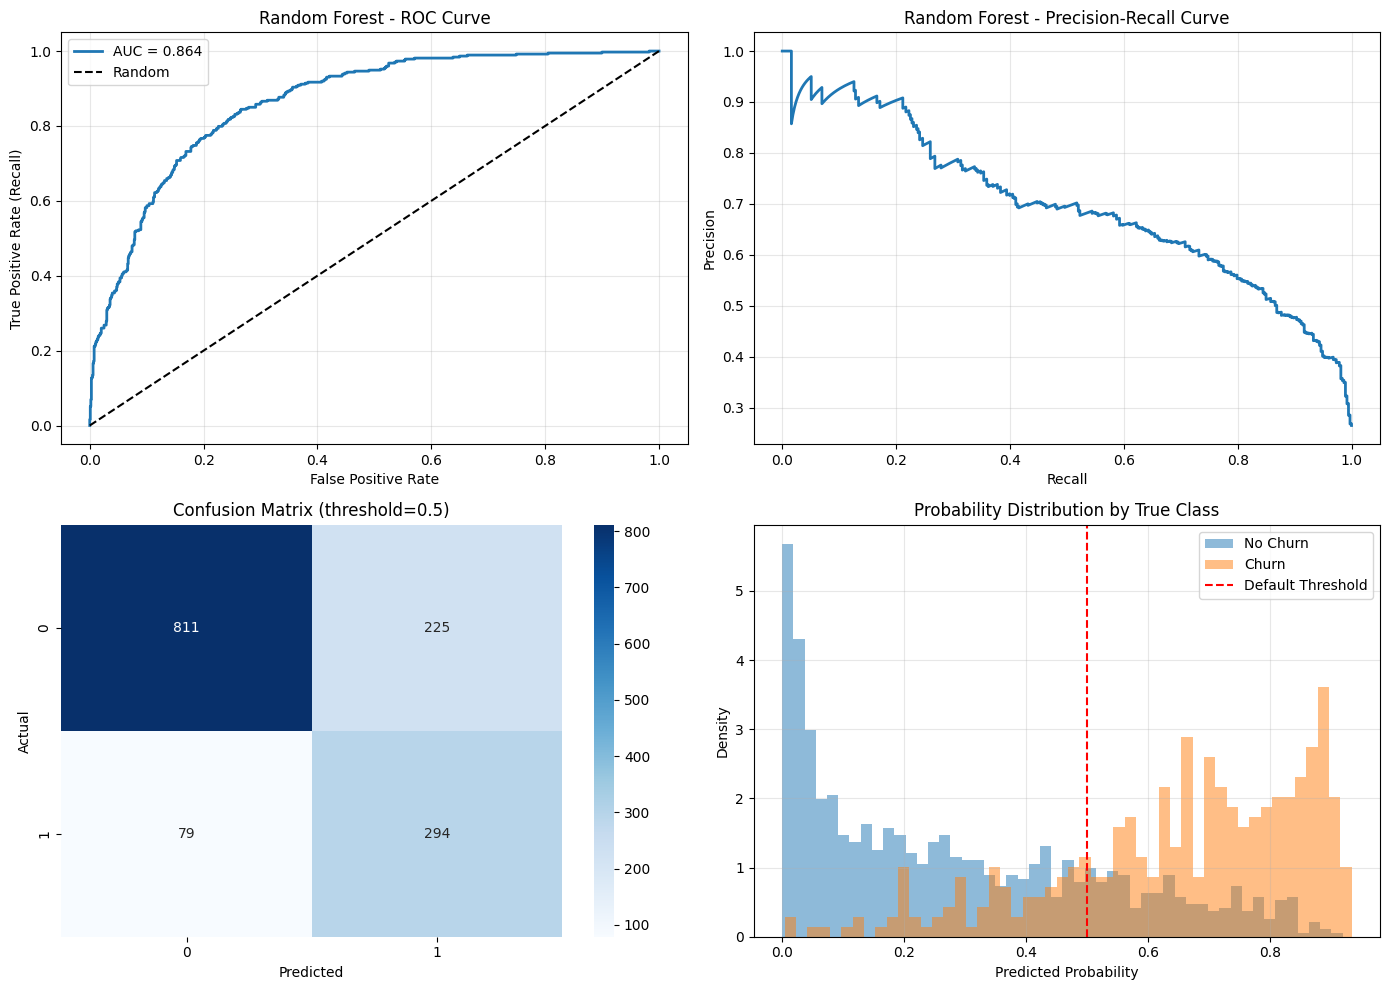

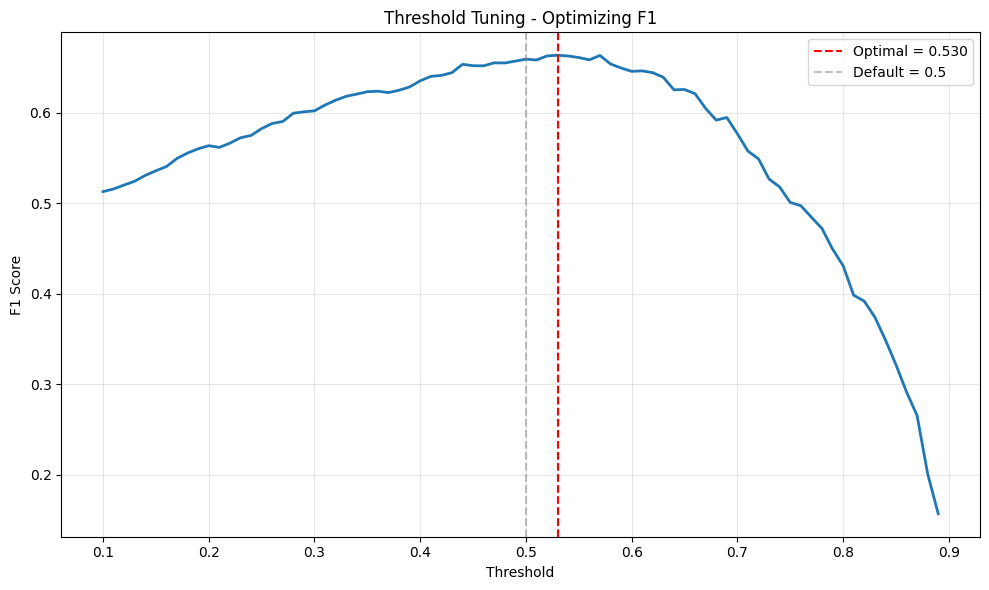

2025/10/06 16:08:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged Random_Forest to MLflow
🏃 View run Random_Forest at: http://localhost:8080/#/experiments/606129430161485727/runs/9cc4dca91ee44f798f653250eddb63ee
🧪 View experiment at: http://localhost:8080/#/experiments/606129430161485727

TRAINING XGBOOST
Class imbalance ratio: 2.77
Running in QUICK mode (faster, smaller grid)
Starting grid search...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__subsample': 0.8}
Best CV roc_auc: 0.8453

XGBoost Results
Train AUC: 0.8602
Test AUC:  0.8641
Overfit:   -0.0040

Test Set Performance (threshold=0.5):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.54      0.61       373

    accuracy                           0.82      1409
   ma

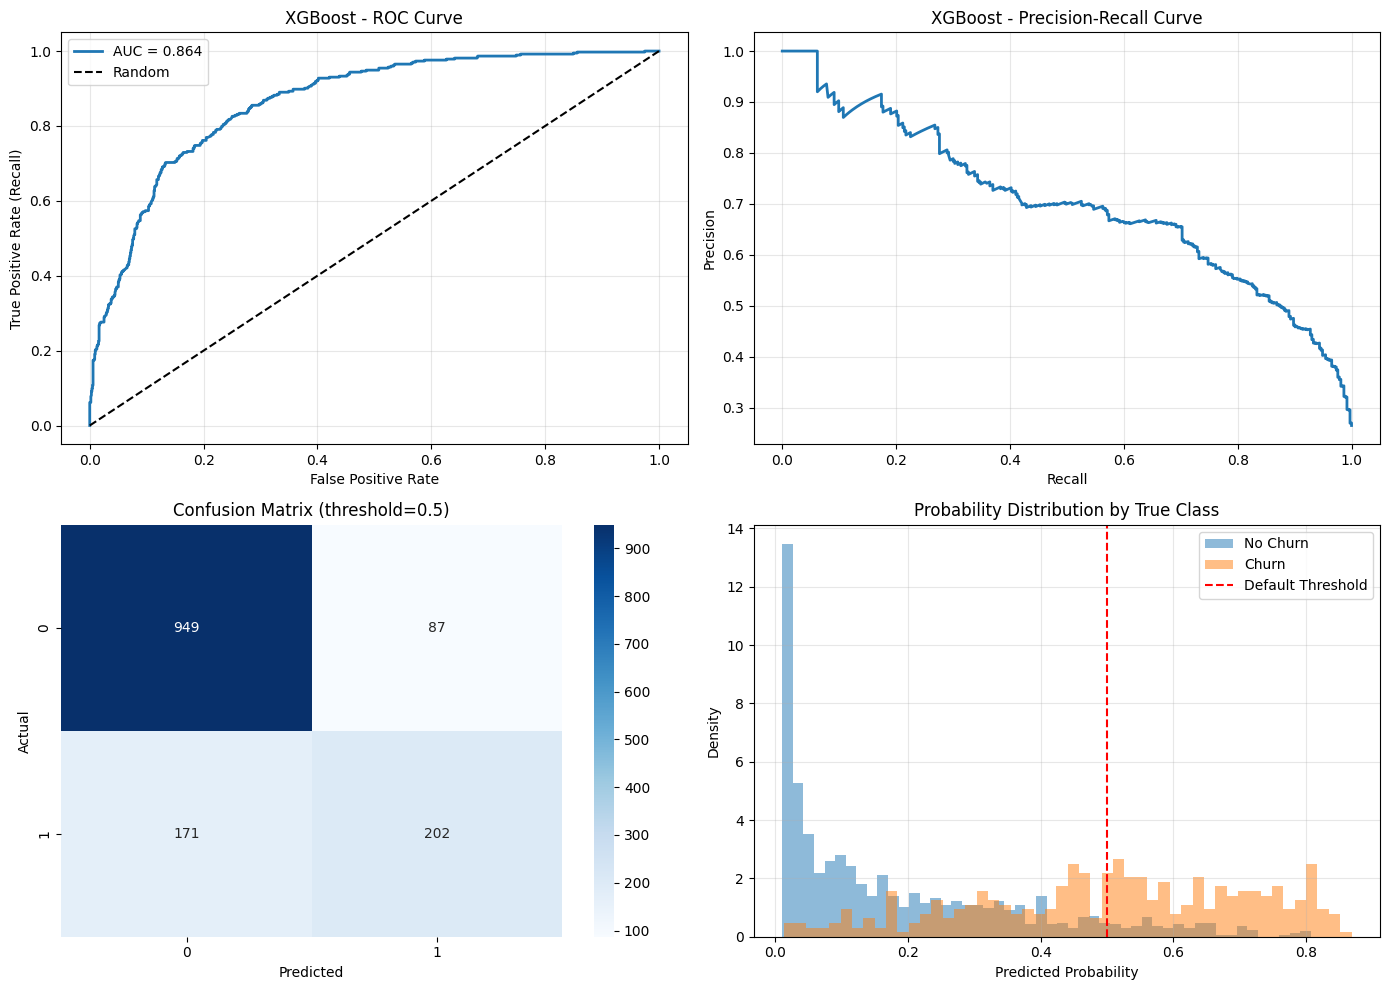

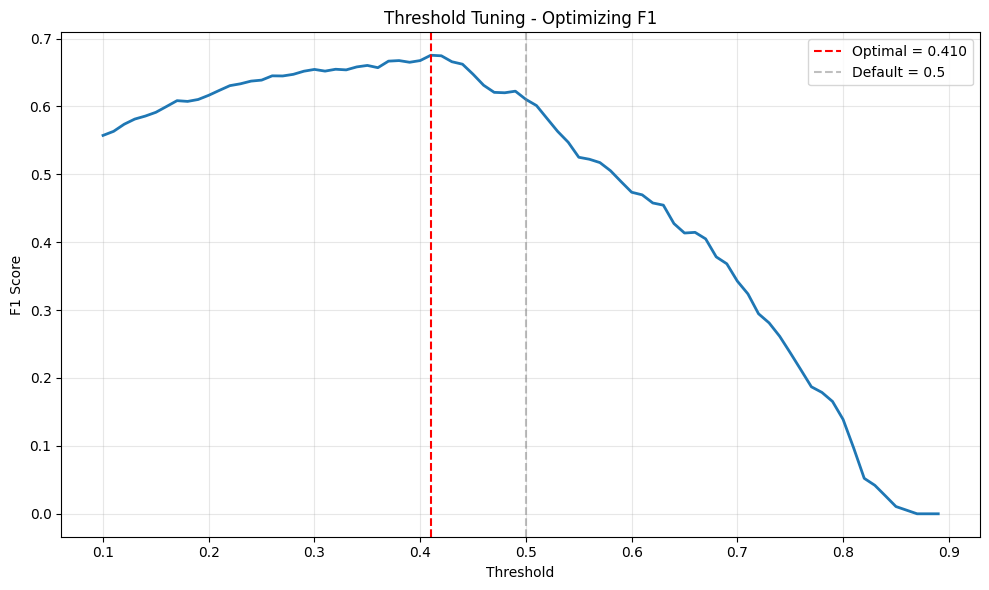

2025/10/06 16:10:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged XGBoost to MLflow
🏃 View run XGBoost at: http://localhost:8080/#/experiments/606129430161485727/runs/c7dfbe35bfb24377bd5e82ef3273ebcd
🧪 View experiment at: http://localhost:8080/#/experiments/606129430161485727
Logistic Regression Test AUC: 0.8607
Random Forest Test AUC: 0.8642
XGBoost Test AUC:       0.8641


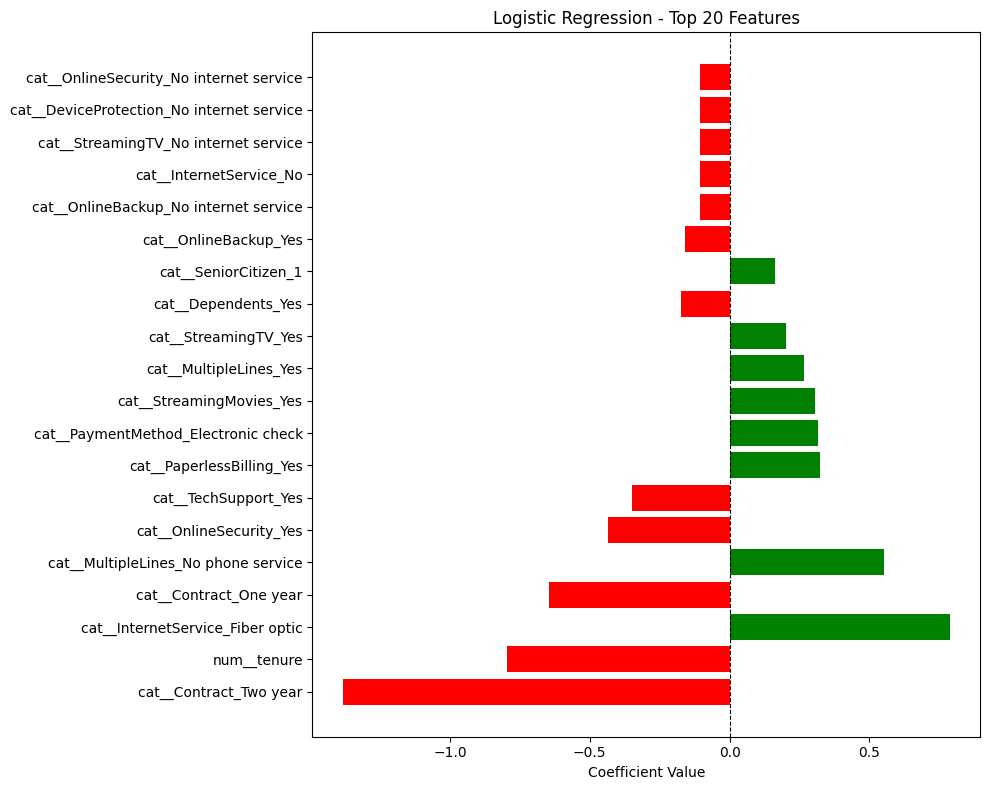

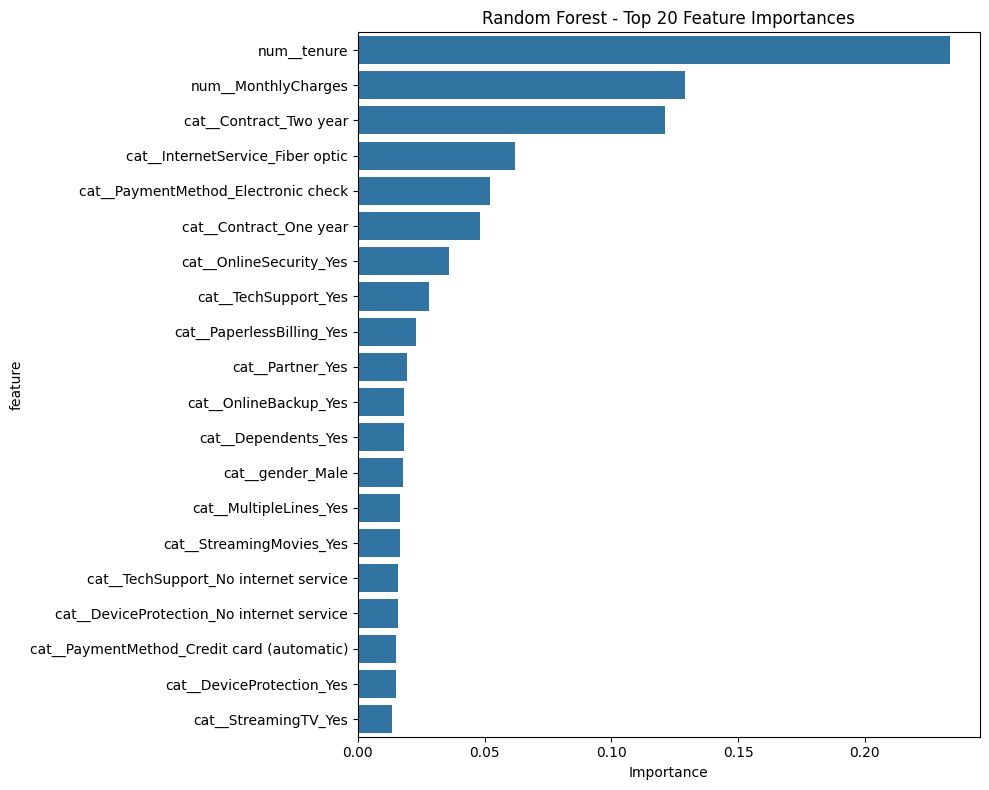

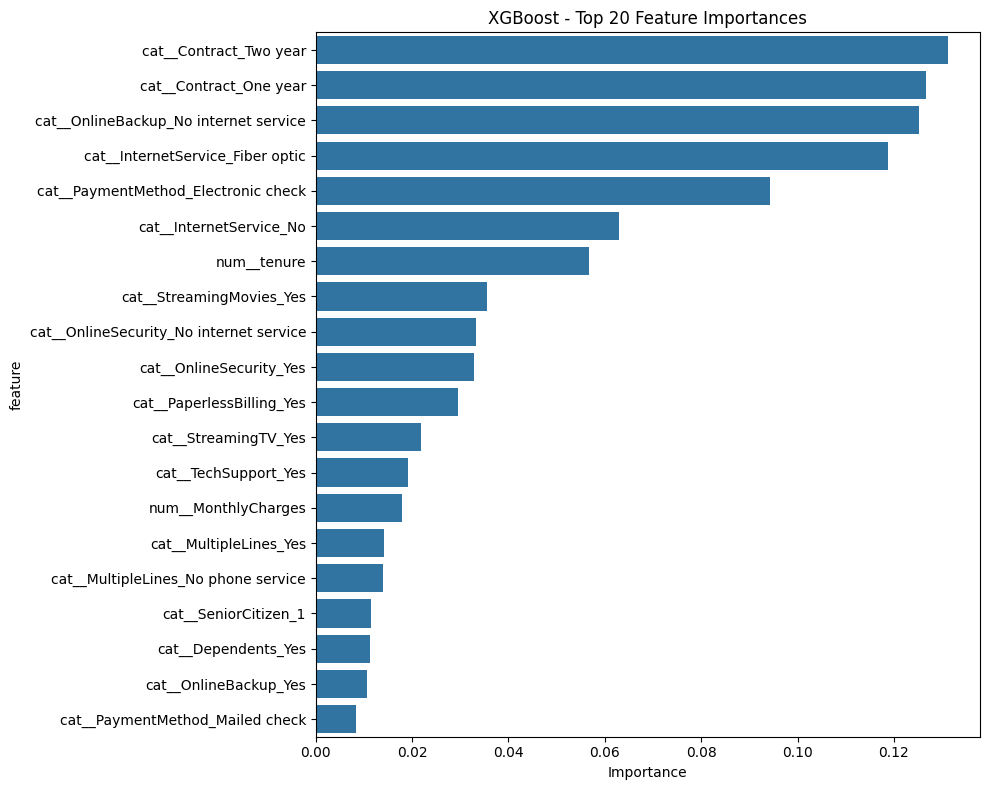

The best model is: randomforestclassifier


In [3]:
"""
KEY METRICS:
-------------
1. TRAINING OBJECTIVE: Models optimize log loss (cross-entropy)
   - NOT accuracy, precision, or recall
   - Learns probabilities that minimize prediction error
   
2. EVALUATION METRICS: We evaluate on different metrics
   - AUC: Threshold-independent, measures ranking quality
   - Accuracy/Precision/Recall: Threshold-dependent (default=0.5)
   
3. THRESHOLD TUNING: Separate step after training
   - Model gives probabilities: [0.23, 0.87, 0.45, ...]
   - Threshold converts to classes: prob > 0.5 → class 1
   - Tune threshold based on business costs
   
WORKFLOW:
---------
Train (optimize log loss) → Evaluate (check AUC) → Tune threshold (optimize business metric)
"""
# ═══════════════════════════════════════════════════════════════════════
# COMPLETE MODEL TRAINING WORKFLOW
# ═══════════════════════════════════════════════════════════════════════

# STEP 0: Prepare your pipelines
# ────────────────────────────────────────────────────────────────────────

le = LabelEncoder()
y_train = le.fit_transform(y_train)  # 'No'->0, 'Yes'->1
y_test = le.transform(y_test)

# Create pipelines

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(random_state=42, criterion='log_loss'))
])

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbclassifier', XGBClassifier(
        random_state=42, 
        eval_metric='logloss'
    ))
])

# STEP 1: Train Logistic Regression
# ────────────────────────────────────────────────────────────────────────
lr_model_xpn = my_util.train_logistic(
    pipeline_lr, 
    X_train, y_train, 
    X_test, y_test,
    quick_mode=True  # Start with quick mode
)

# STEP 2: Train Random Forest
# ────────────────────────────────────────────────────────────────────────
rf_model_xpn = my_util.train_random_forest(
    pipeline_rf, 
    X_train, y_train, 
    X_test, y_test,
    quick_mode=True  # Start with quick mode
)


# STEP 3: Train XGBoost
# ────────────────────────────────────────────────────────────────────────
xgb_model_xpn = my_util.train_xgboost(
    pipeline_xgb,
    X_train, y_train,
    X_test, y_test,
    quick_mode=True
)


# STEP 4: Compare models
# ────────────────────────────────────────────────────────────────────────
print(f"Logistic Regression Test AUC: {lr_model_xpn[2]['test_auc']:.4f}")
print(f"Random Forest Test AUC: {rf_model_xpn[2]['test_auc']:.4f}")
print(f"XGBoost Test AUC:       {xgb_model_xpn[2]['test_auc']:.4f}")


# STEP 5: Analyze feature importance
# ────────────────────────────────────────────────────────────────────────
feature_names = lr_model_xpn[0].named_steps['preprocessor'].get_feature_names_out()

lr_importance = my_util.plot_logistic_regression_coefficients(lr_model_xpn[0], feature_names, "Logistic Regression")
rf_importance = my_util.plot_tree_feature_importance(rf_model_xpn[0], feature_names, "Random Forest")
xgb_importance = my_util.plot_tree_feature_importance(xgb_model_xpn[0], feature_names, "XGBoost")


# STEP 6: Tune threshold for business metric
# ────────────────────────────────────────────────────────────────────────
# Use the best model's probabilities

best_model_xpn = sorted([lr_model_xpn, rf_model_xpn, xgb_model_xpn], key=lambda x:x[2]['test_auc'], reverse=True)[0]
print(f"The best model is: {[n for n, c in best_model_xpn[0].named_steps.items() if n != 'preprocessor'][0]}")

# y_test_proba = best_model_xpn[0].predict_proba(X_test)[:, 1]

# # Optimize for F1 score
# optimal_thresh, metrics, fig = my_util.find_optimal_threshold(
#     y_test, 
#     y_test_proba, 
#     metric='f1'
# )


# # STEP 7: Make final predictions with optimal threshold
# # ────────────────────────────────────────────────────────────────────────
# y_pred_final = (y_test_proba >= optimal_thresh).astype(int)

# print(classification_report(y_test, y_pred_final))